In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import svd
import h5py
import sympy as sym

# №1

$$
f(x, a) = \sqrt{x+a} - \sqrt{x} = \frac{(\sqrt{x+a} - \sqrt{x})(\sqrt{x+a} + \sqrt{x})}{\sqrt{x+a} + \sqrt{x}} = \frac{a}{\sqrt{x+a} + \sqrt{x}}
$$

# №2

In [17]:
from mpmath import *
mp.dps = 64 # precision (in decimal places)
x = mp.power(10, 100)
mp.tan(x)

0.4320458056166690197593783572604528727053527543871788951777017692

$$ f(x) = tan(x)$$

$$\kappa = \frac{\Vert J(x) \Vert}{\Vert f(x)\Vert / \Vert x \Vert} = \frac{x}{cos^2(x)tan(x)} $$ 

In [20]:
kappa = x/(mp.power(mp.cos(x), 2) * mp.tan(x))
kappa

2.746615203119965593780244375369625727567014698359612771954891972e+100

$$\kappa \approx 2.75*10^{100}$$
Нужно хранить 100 + 7 = 107 чисел

# №3

# №4

# №5

In [73]:
from mpmath import mp, mpf
mp.dps = 64 # precision (in decimal places)

def f_mpf(n, alpha):
    f = mp.zeros(1, n + 1)
    f[0] = mp.log(1 + 1 / mpf(alpha))
    for i in range(1, n + 1):
        f[i] = 1 / mpf(i) - mpf(alpha) * f[i - 1]
    return f

def f_dt(dtype, n, alpha):
    f = np.zeros(n + 1, dtype=dtype)
    f[0] = np.log(1 + 1 / np.array(alpha, dtype=dtype))
    for i in range(1, n + 1):
        f[i] = 1 / np.array(i, dtype=dtype) - np.array(alpha, dtype=dtype) * f[i - 1]

    return f

def compare(dtype, n, alpha):
    diff = f_mpf(n, alpha) - f_dt(dtype, n, alpha)
    diff /= np.finfo(dtype).eps

N = 20
print(f_dt(np.float64, N, 0.1)[N])
print(f_mpf(N, 0.1)[N])
print("="*30)
print(f_dt(np.float64, N, 10.0)[N])
print(f_mpf(N, 10.0)[N])

0.045239221952429354
0.04523922195242935245858041690393530986774908073160529352111067169
7483.468021084803
0.004347035818028109090259473900056452612527289123945727091920103668


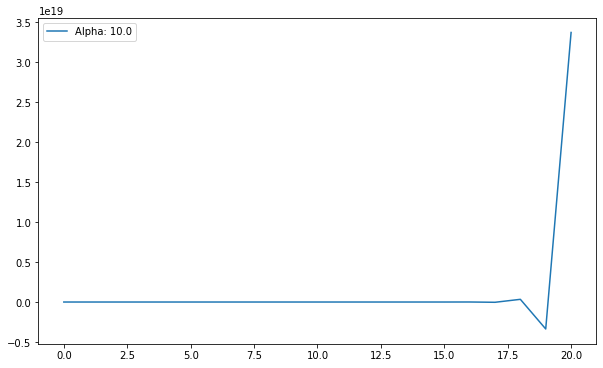

In [83]:
alpha_ = 10.0
diff = f_dt(np.float64, 20, alpha_) - f_mpf(20, alpha_)
diff /= np.finfo(np.float64).eps
plt.figure(figsize=(10, 6))
plt.plot(diff, label = f"Alpha: {alpha_}")
plt.legend()

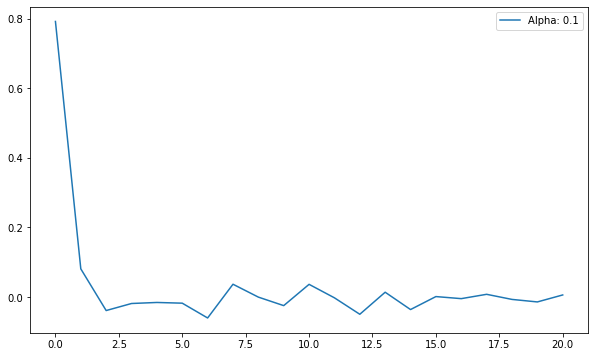

In [84]:
alpha_ = 0.1
diff = f_dt(np.float64, 20, alpha_) - f_mpf(20, alpha_)
diff /= np.finfo(np.float64).eps
plt.figure(figsize=(10, 6))
plt.plot(diff, label = f"Alpha: {alpha_}")
plt.legend()

# №6

# №7